In [2]:
cd ..

/home/elimen/Data


In [3]:
ls

apex/                            lost+found/
cocoapi/                         mask-textspotter_v3/
Code/                            OCR_dataset/
cptn_crnn_pytorch/               OCR_paper/
cptn_crnn_pytorch_bak/           P/
crnn_chinese_recognition_mxnet/  Project/
crnn_ori_pytorch/                Pytorch_Example/
crnn_pytorch/                    tensorboardx_demo/
dbnet_pytorch/                   text_recognition_toolbox/


In [4]:
cd OCR_dataset/

/home/elimen/Data/OCR_dataset


In [5]:
import os 
datadir = "MLT2019/Task1/Images"
labelsdir = "MLT2019/Task1/train_gt_t13"
print(os.path.isdir(datadir))
img_names = os.listdir(datadir)
print(len(img_names))

True
10000


In [18]:
for i in range(len(img_names)):
    if img_names[i].split('.')[1] != "jpg" and img_names[i].split('.')[1] !="png":
        print(img_names[i])

tr_img_01438.gif
tr_img_01674.gif
tr_img_00165.gif
tr_img_00102.gif


MLT2019/Task1/ImagesPart1/tr_img_03048.jpg


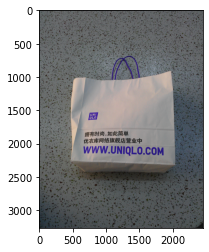

In [38]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(os.path.join(datadir,'tr_img_03048.jpg'))
print (os.path.join(datadir,'tr_img_03048.jpg'))
plt.imshow(img)
plt.show()

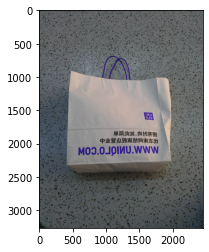

In [39]:
img_inv = img[:,::-1,:]
plt.imshow(img_inv)
plt.show()

In [41]:
img.shape

(3264, 2448, 3)

In [43]:
heights = [11, 16, 23, 33, 48, 68, 97, 139, 198, 283]
widths = [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
print(type(heights))

<class 'list'>


In [53]:
import numpy as np
heights = np.array(heights).reshape(len(heights), 1)
widths = np.array(widths).reshape(len(heights),1)

In [54]:
print(heights.shape)
print(widths.shape)

(10, 1)
(10, 1)


In [58]:
base_anchor = np.array([0, 0, 15, 15])
xt = (base_anchor[0] + base_anchor[2]) * 0.5
yt = (base_anchor[1] + base_anchor[3]) * 0.5
print((xt,yt))

(7.5, 7.5)


In [79]:
x1 = xt - widths * 0.5
y1 = yt - heights * 0.5
x2 = xt + widths * 0.5
y2 = yt + heights * 0.5
base_anchor = np.hstack((x1, y1, x2, y2))
print(base_anchor)
print(len(base_anchor))

[[  -0.5    2.    15.5   13. ]
 [  -0.5   -0.5   15.5   15.5]
 [  -0.5   -4.    15.5   19. ]
 [  -0.5   -9.    15.5   24. ]
 [  -0.5  -16.5   15.5   31.5]
 [  -0.5  -26.5   15.5   41.5]
 [  -0.5  -41.    15.5   56. ]
 [  -0.5  -62.    15.5   77. ]
 [  -0.5  -91.5   15.5  106.5]
 [  -0.5 -134.    15.5  149. ]]
10


In [80]:
h, w = (1280/16,1600/16)
print((h,w))
scale = 16
shift_x = np.arange(0, w) * scale
shift_y = np.arange(0, h) * scale
print(len(shift_x))
print(len(shift_y))

(80.0, 100.0)
100
80


In [82]:
anchor = []
for i in shift_y:
    for j in shift_x:
        anchor.append(base_anchor + [j, i, j, i])
print(anchor[10])

[[ 159.5    2.   175.5   13. ]
 [ 159.5   -0.5  175.5   15.5]
 [ 159.5   -4.   175.5   19. ]
 [ 159.5   -9.   175.5   24. ]
 [ 159.5  -16.5  175.5   31.5]
 [ 159.5  -26.5  175.5   41.5]
 [ 159.5  -41.   175.5   56. ]
 [ 159.5  -62.   175.5   77. ]
 [ 159.5  -91.5  175.5  106.5]
 [ 159.5 -134.   175.5  149. ]]


In [85]:
tmp = np.array(anchor)
tmp.reshape((-1, 4))

array([[-5.0000e-01,  2.0000e+00,  1.5500e+01,  1.3000e+01],
       [-5.0000e-01, -5.0000e-01,  1.5500e+01,  1.5500e+01],
       [-5.0000e-01, -4.0000e+00,  1.5500e+01,  1.9000e+01],
       ...,
       [ 1.5835e+03,  1.2020e+03,  1.5995e+03,  1.3410e+03],
       [ 1.5835e+03,  1.1725e+03,  1.5995e+03,  1.3705e+03],
       [ 1.5835e+03,  1.1300e+03,  1.5995e+03,  1.4130e+03]])

In [89]:
anchor[10][0]

array([159.5,   2. , 175.5,  13. ])

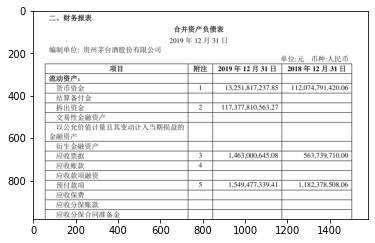

In [259]:
tableimg = cv2.imread("mt01.png")
plt.imshow(tableimg[:,:,::-1])
plt.show()

108


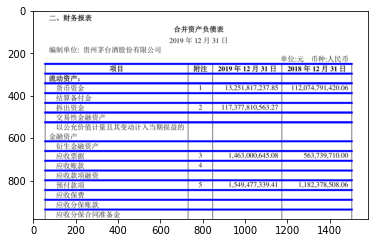

In [287]:
import math
tableimg_grey = cv2.cvtColor(tableimg,cv2.COLOR_BGR2GRAY)

edgesimg = cv2.Canny(tableimg_grey, 50, 200)
cv2.imwrite("canny.jpg",edgesimg)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mophologyimg = cv2.dilate(edgesimg, kernel)
cv2.imwrite("dilate.jpg",mophologyimg)

linesP = cv2.HoughLinesP(mophologyimg, 1, np.pi / 180, threshold = 100, lines=10, minLineLength=250, maxLineGap=1)    #100,10,250
new = tableimg.copy()
print(len(linesP))
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
    
#lines = cv2.HoughLines(edgesimg, 0.2, np.pi / 180, 100)
#print(len(lines))
#thetas = []
#for line in lines:
#   for rho, theta in line:
#        a = np.cos(theta)
#        b = np.sin(theta)
#        x0 = a * rho
#        y0 = b * rho
#        x1 = int(x0 + 1000 * (-b))
#        y1 = int(y0 + 1000 * (a))
#        x2 = int(x0 - 1000 * (-b))
#        y2 = int(y0 - 1000 * (a))
#        if theta == 0:
#            thetas.append(theta)
#            new = cv2.line(new, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite("houghlines.jpg",new)
plt.imshow(new)
plt.show()

In [142]:
np.pi /2

1.5707963267948966